In [12]:
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib
from matplotlib.ticker import NullFormatter, FixedLocator
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib.image as mpimg
# matplotlib.artist.getp(fig.patch) # https://matplotlib.org/stable/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import Math
import sympy as sym
from sympy.plotting import plot as symplot

sym.init_printing()  # automatically enable the best printer available in your environment.
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
# latex output
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.rcParams.update({
    'text.usetex': True,
    'pgf.rcfonts': False,
    "pgf.preamble": [
        r'\usepackage{color}'     # xcolor for colours
    ]
})
matplotlib.rcParams['savefig.pad_inches'] = 0
# use plt.savefig('figure.pdf') as export

In [13]:
# usually this notebook is loaded as top-level-module and relative import of chsimpy does not work.
# so we provide the path to the chsimpy package manually
import pathlib
import sys

try:
    import chsimpy
except ImportError:
    _parentdir = pathlib.Path("./").resolve().parent
    sys.path.insert(0, str(_parentdir))
    import chsimpy
    #sys.path.remove(str(_parentdir))

# auto reload if chsimpy code changed
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# labels and colors used throughout this notebook
yclabel = '$\mid \widetilde{c}_A - \widetilde{c}_B\mid$'
wtseplabel = '$\widetilde{t}_{0}$'
tseplabel = '$t_0$'
yslabel = '$\mid \widetilde{s}_A - \widetilde{s}_B\mid$'
color1 = '#b72300'  # https://venngage.com/tools/accessible-color-palette-generator
color2 = '#1005af'
color3 = '#00581a'
msize = 2 # markersize
m1 = 'o' # marker symbol
m2 = '.'

In [15]:
# scalars-run95-0.875.csv
# E2-run99-0.875.csv
dirfiles = '../_output/matlab-randA-c0'
c08=0.875
c09=0.89
runs=100
fileid = lambda runid, attr, xxx: f"{dirfiles}/{attr}-run{runid}-{xxx}.csv";

# A0+A1 varied both
# dirfiles2 = '../_output/v0.9b'
# fileid2 = '0.89'
# rawfile2 = f"{dirfiles2}/experiment-{fileid2}-raw.csv"
# sysinfofile2 = f"{dirfiles2}/experiment-{fileid2}-metadata.csv"
# aggfile2 = f"{dirfiles2}/experiment-{fileid2}-agg.csv"
# paramfile2 = f"{dirfiles2}/solution-{fileid2}-run0.yaml"

In [16]:
dfsc08 = pd.read_csv(fileid(1,'scalars',c08), sep=',')
dfsc09 = pd.read_csv(fileid(1,'scalars',c09), sep=',')
for runid in range(2,runs+1):
    dfsc08.loc[runid-1] = pd.read_csv(fileid(runid,'scalars',c08), sep=',', header=None, skiprows=1).values[0]
    dfsc09.loc[runid-1] = pd.read_csv(fileid(runid,'scalars',c09), sep=',', header=None, skiprows=1).values[0]
    # dfSA = pd.DataFrame(chsimpy.utils.csv_import_matrix(fileid(1,'SA',c0)))[:tau0]
    # t0 = tau0*(1e-11)*1/(2e-11*0.2851876392072164)
    # scalars.append([tau0,t0,t0/60])
#dfE = pd.DataFrame(chsimpy.utils.csv_import_matrix(fileid(1,'E',c0)))[:tau0]
#dfE2 = pd.DataFrame(chsimpy.utils.csv_import_matrix(fileid(1,'E2',c0)))[:tau0]
#dfst=pd.DataFrame(st, columns=['tau0','t0','t0min'])

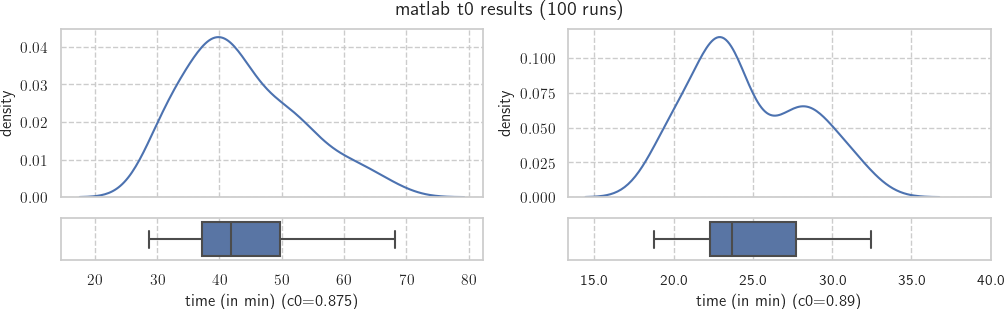

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 3), sharex=False, gridspec_kw={'height_ratios': [4, 1]})

tseps08=dfsc08.t0/60 # t0 in min
tseps09=dfsc09.t0/60 # t0 in min
#
# nrow, ncol, index
sns.kdeplot(tseps08, ax=axs[0,0], bw_adjust=1)
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('density')

sns.boxplot(tseps08, orient='h', ax=axs[1,0])
axs[1,0].set_xlabel(f"time (in min) (c0={c08})")
axs[1,0].set_ylabel('')
axs[1,0].set(yticklabels=[])
axs[1,0].sharex(axs[0,0])
# convert iterations to time-scale on x-axis, https://stackoverflow.com/a/74544761
#fig.suptitle(f"Density and boxplot of $t_{{sep}}$ with {count2} random $A_0 \\times A_1$ (1\% range)")

sns.kdeplot(tseps09, ax=axs[0,1], bw_adjust=1)
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('density')

sns.boxplot(tseps09, orient='h', ax=axs[1,1])
axs[1,1].set_xlabel(f"time (in min) (c0={c09})")
axs[1,1].set_ylabel('')
axs[1,1].set(yticklabels=[])
axs[1,1].sharex(axs[0,1])

# convert iterations to time-scale on x-axis, https://stackoverflow.com/a/74544761
plt.xticks(ticks=plt.xticks()[0][1:], 
           labels=np.round(np.array(plt.xticks()[0][1:], dtype=np.float64)))


axs[0,0].tick_params('x', labelbottom=False)
axs[0,1].tick_params('x', labelbottom=False)


plt.suptitle('matlab t0 results'+f" ({runs} runs)")
#plt.savefig('tex/pictures/fig_density_boxplot.pdf', bbox_inches='tight', pad_inches=0)
display(fig)
matplotlib.pyplot.close()

In [7]:
# chsimpy.utils.csv_export_matrix(dfsc08[['A0T','A1T']], 'matlab-A-file-0875.csv')
# chsimpy.utils.csv_export_matrix(dfsc09[['A0T','A1T']], 'matlab-A-file-089.csv')
# test=chsimpy.utils.csv_import_matrix('matlab-A-file-089.csv')
# test.shape[0]

In [32]:
fname=f"../_output/v0.9b/experiment-{c0}-raw.csv"
dfpy=pd.read_csv(fname)

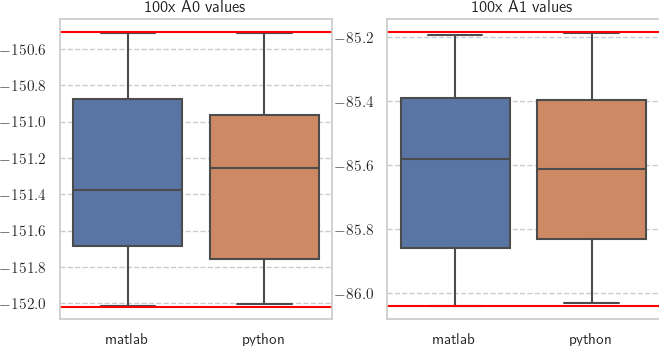

In [79]:
A0val = 186.0575 - 0.3654 * 923.15
A1val = 43.7207 - 0.1401 * 923.15
A0s = dfsc.A0T
A1s = dfsc.A1T

fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(6, 3),
                        layout=None,
                        gridspec_kw={'wspace': 0.2,
                                     'hspace': 0.,
                                     'top': 1,
                                     'right': 1,
                                     'bottom': 0.,
                                     'left': 0.
                                    },
                        clear=True)
ax1 = axs[0]
ax2 = axs[1]

#ax1.plot(A0s, A1s, '.')
#ax2.plot(dfpy.A0, dfpy.A1, '.')
sns.boxplot([A0s,dfpy.A0], ax=ax1)
ax1.set(xticklabels=['matlab','python'])
ax1.axhline(0.995*A0val, c='red')
ax1.axhline(1.005*A0val, c='red')
ax1.set_title(f"{runs}x A0 values")

sns.boxplot([A1s,dfpy.A1], ax=ax2)
ax2.set(xticklabels=['matlab','python'])
ax2.axhline(0.995*A1val, c='red')
ax2.axhline(1.005*A1val, c='red')
ax2.set_title(f"{runs}x A1 values")
#ax2.imshow(U2, cmap=cmap, aspect="equal")

plt.show()

In [120]:
salist08 = []
salist09 = []
for rid in range(1,runs):
    tau0 = int(dfsc08.tau0[rid-1])
    salist08.append(1-pd.DataFrame(chsimpy.utils.csv_import_matrix(fileid(rid,'SA',c08))).values[tau0-1][0])
    tau0 = int(dfsc09.tau0[rid-1])
    salist09.append(1-pd.DataFrame(chsimpy.utils.csv_import_matrix(fileid(rid,'SA',c09))).values[tau0-1][0])

In [8]:
# A0+A1 varied both
dirfiles2 = '../_output/v0.9b-afile-uinit-089'
fileid2 = 'matlab-Afile-simple'
rawfile2 = f"{dirfiles2}/experiment-{fileid2}-raw.csv"
dfraw2 = pd.read_csv(rawfile2, index_col=['id'])

In [19]:
dfsc09

,A0T,A1T,t0,tau0,N,XXX,delt,kappa,M
0,-151.256802,-85.966805,1243.041252,709.0,512.0,0.89,1.000000e-11,0.285188,2.000000e-11
1,-151.789040,-85.291842,1872.451420,1068.0,512.0,0.89,1.000000e-11,0.285188,2.000000e-11
2,-150.640294,-85.414958,1395.572407,796.0,512.0,0.89,1.000000e-11,0.285188,2.000000e-11
3,-151.735805,-85.324440,1828.620628,1043.0,512.0,0.89,1.000000e-11,0.285188,2.000000e-11
4,-151.662555,-85.696212,1472.714600,840.0,512.0,0.89,1.000000e-11,0.285188,2.000000e-11
...,...,...,...,...,...,...,...,...,...
95,-151.845210,-85.406317,1795.309227,1024.0,512.0,0.89,1.000000e-11,0.285188,2.000000e-11
96,-151.463442,-85.280627,1767.257520,1008.0,512.0,0.89,1.000000e-11,0.285188,2.000000e-11
97,-150.841122,-85.549636,1371.027163,782.0,512.0,0.89,1.000000e-11,0.285188,2.000000e-11
98,-151.994357,-85.995276,1383.299785,789.0,512.0,0.89,1.000000e-11,0.285188,2.000000e-11


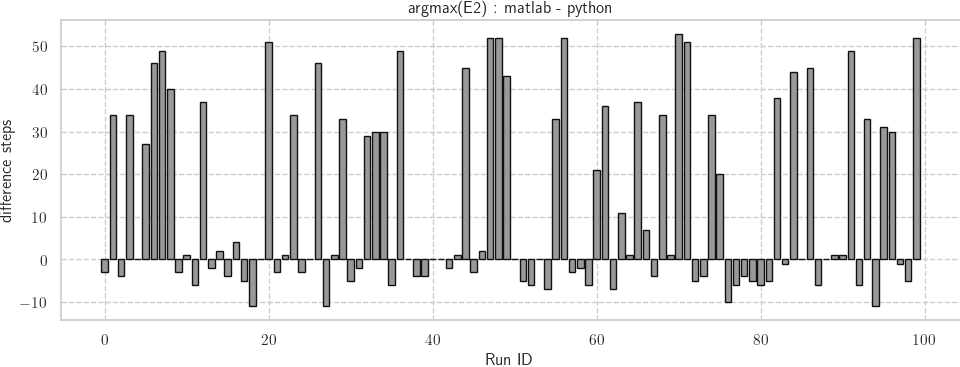

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=1,
                        figsize=(9, 3),
                        layout=None,
                        gridspec_kw={'wspace': 0.2,
                                     'hspace': 0.,
                                     'top': 1,
                                     'right': 1,
                                     'bottom': 0.,
                                     'left': 0.
                                    },
                        clear=True)
ax1 = axs#[0]
#ax2 = axs[1]

ax1.bar(x=range(runs), height=dfsc09.tau0-dfraw2.tsep, color='#999999', edgecolor='#111111')
#ax2.plot(dfsc09.tau0, '.')
ax1.set_xlabel('Run ID')
ax1.set_ylabel('difference steps')

# sns.boxplot(salist08, ax=ax1)
# sns.boxplot(salist09, ax=ax2)

#ax2.imshow(U2, cmap=cmap, aspect="equal")
ax1.set_title(f"argmax(E2) : matlab - python")

plt.show()

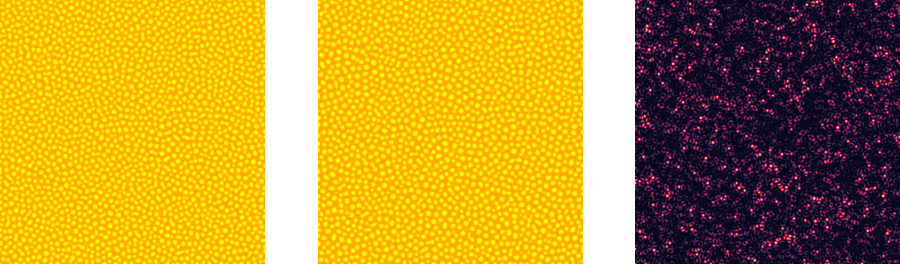

In [20]:
U = pd.DataFrame(chsimpy.utils.csv_import_matrix(fileid(5,'U',c08)))
U2 = pd.DataFrame(chsimpy.utils.csv_import_matrix(fileid(4,'U',c08)))
N = 512

# colormap, https://matplotlib.org/stable/gallery/color/custom_cmap.html
cmap = colors.LinearSegmentedColormap.from_list('mylist', ['orange', 'yellow'], N=25)

fig, axs = plt.subplots(nrows=1, ncols=3,
                        figsize=(9, 4),
                        layout=None,
                        gridspec_kw={'wspace': 0.2,
                                     'hspace': 0.,
                                     'top': 1,
                                     'right': 1,
                                     'bottom': 0.,
                                     'left': 0.
                                    },
                        clear=True)
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.imshow(U, cmap=cmap, aspect="equal")
ax1.axis(False)

ax2.imshow(U2, cmap=cmap, aspect="equal")
ax2.axis(False)

ax3.imshow(np.abs(U-U2), aspect="equal")
ax3.axis(False)

plt.show()